<a href="https://colab.research.google.com/github/Rishekh/Email-Campaign/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Problem Statement</b>
Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business. 

This dataset has customer interaction over email.

#### <b> Business Goal</b>

We are required to build a model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path ="/content/drive/MyDrive/Colab Notebooks/Email Campaign/data_email_campaign.csv"

In [ ]:
#Loading the dataset
dataset= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Email Campaign/data_email_campaign.csv")

## Data Inspection

Lets look at the first few rows of the dataframe

In [ ]:
dataset.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


Lets look at the last few rows of the dataframe

In [ ]:
dataset.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
dataset.shape

(68353, 12)

###**Shape of our dataset is (68353, 12) that means we have 68353 number of rows and 12 columns**

list of columns in the dataframe:

In [ ]:
dataset.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
dataset.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


###**Data Cleaning**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


###**There is some null value present in our dataset**

In [ ]:
#We have replaced null values by 0
dataset=dataset.fillna(0)
#dataset.dropna(inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          68353 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  68353 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                68353 non-null  float64
 10  Total_Images               68353 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


**Handling Outliers**

In this section, we will use the seaborn library to create a boxplot

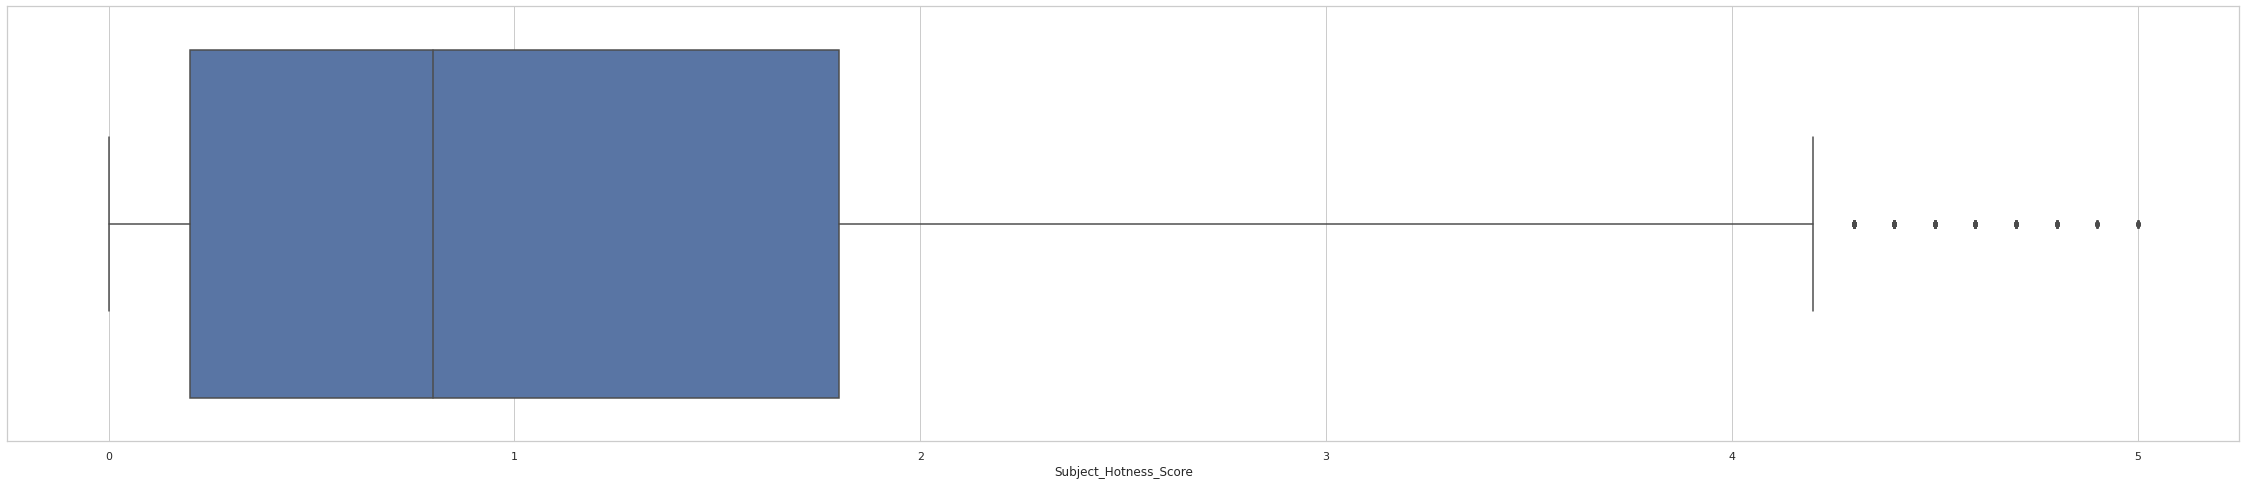

In [ ]:

sns.set(style='whitegrid')
plt.figure(figsize=(40,8))
ax = sns.boxplot(x='Subject_Hotness_Score',data=dataset ,orient="h")

In [ ]:
# Position of the Outlier
print(np.where(dataset['Subject_Hotness_Score']>4))

(array([   35,    79,    93,   426,   481,   699,   987,   991,  1079,
        1307,  1406,  1457,  1514,  1672,  2291,  2295,  3098,  3171,
        3336,  3496,  3604,  3968,  3995,  4079,  4719,  4727,  5030,
        5679,  5795,  5956,  6069,  6137,  6157,  6188,  6373,  6616,
        6679,  7108,  7555,  7612,  7732,  7885,  7921,  7966,  8100,
        8198,  8281,  8286,  8333,  8356,  8403,  8411,  8534,  8668,
        8901,  9198,  9300,  9399,  9423,  9528,  9544, 10689, 11062,
       11343, 11389, 11528, 11809, 11864, 12065, 12220, 12398, 12521,
       13022, 13089, 13163, 13272, 13307, 13362, 13464, 13790, 13991,
       14220, 14276, 14277, 14290, 14536, 14991, 15088, 15666, 15682,
       15916, 15967, 16039, 16079, 16315, 16411, 16576, 16730, 16780,
       16897, 16959, 17004, 17037, 17135, 17326, 17835, 17941, 17988,
       18177, 18525, 18642, 18895, 18942, 19274, 19489, 19864, 19917,
       20074, 20154, 20199, 20280, 20606, 20714, 20847, 21042, 21100,
       21255, 21432

IQR based filtering

In [ ]:
# Inter Quartile Range
Q1 = np.percentile(dataset['Subject_Hotness_Score'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dataset['Subject_Hotness_Score'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
IQR

1.6

Finding the upper and lower limit.

In [ ]:
upper = np.where(dataset['Subject_Hotness_Score'] >= (Q3+1.5*IQR))
lower = np.where(dataset['Subject_Hotness_Score'] <= (Q1-1.5*IQR))

Checking shape of original dataset.

In [ ]:
print("Old Shape: ", dataset.shape)

Old Shape:  (68353, 12)


In [ ]:
#Dropping the outliers
dataset.drop(upper[0], inplace = True)
dataset.drop(lower[0], inplace = True)

New shape of the dataset

In [ ]:
print("New Shape: ", dataset.shape)

New Shape:  (68032, 12)


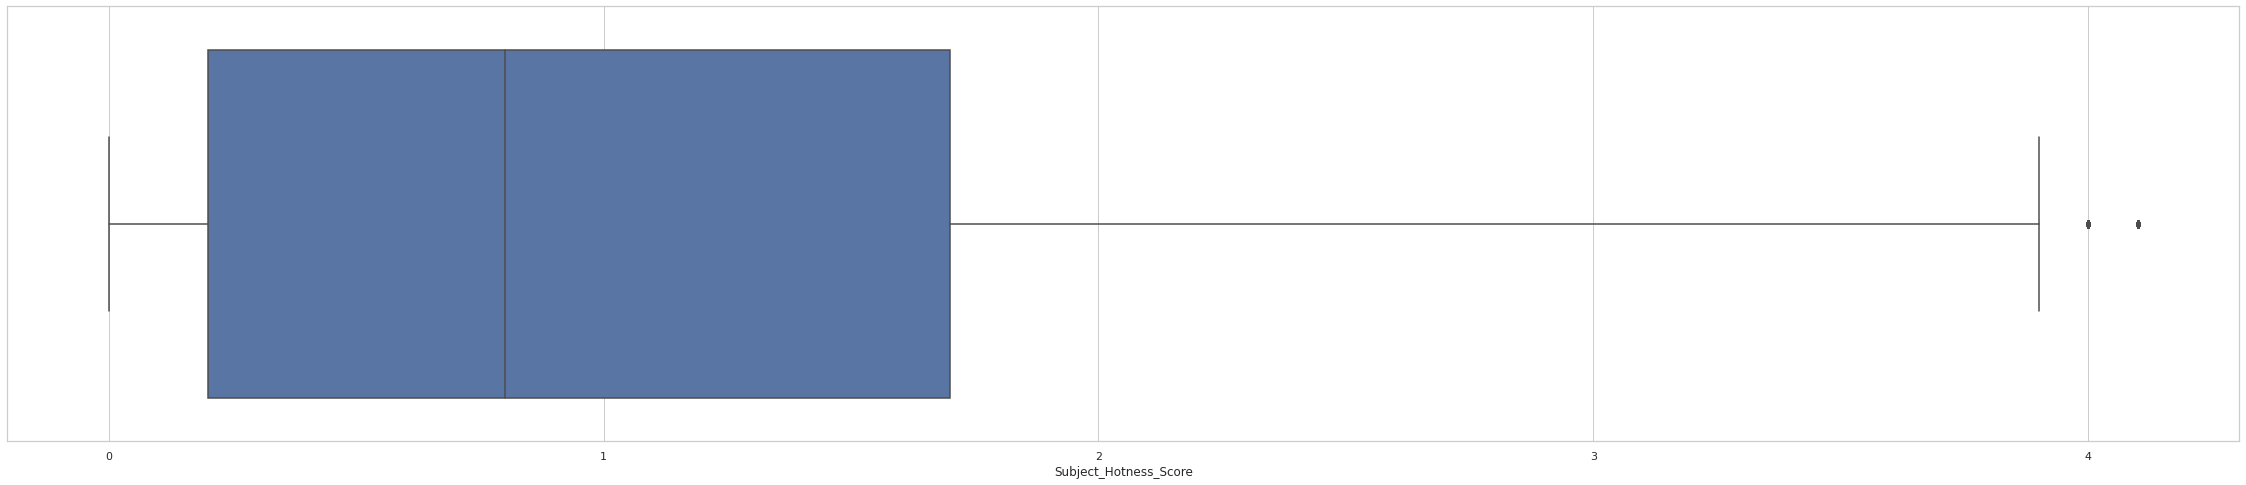

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(40,8))
ax = sns.boxplot(x='Subject_Hotness_Score',data=dataset ,orient="h")

##**Exploratory Data Analysis**

##Customer's location

In [ ]:
list(dataset["Customer_Location"].unique())

['E', 0, 'B', 'C', 'G', 'D', 'F', 'A']

In [ ]:
Locations= dataset["Customer_Location"].value_counts()

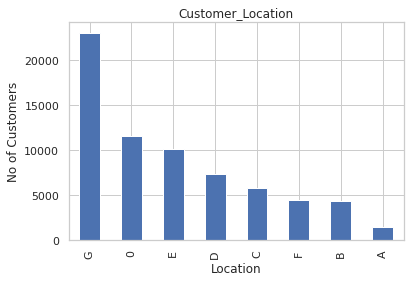

In [ ]:
Locations.plot(kind='bar')

plt.title('Customer_Location')
plt.xlabel('Location')
plt.ylabel('No of Customers')
plt.rcParams['figure.figsize']=(20,4)

From the Bar graph we can see that maximum customers are from "G" around 23173 and from "A" we have minimum customers around 1454.

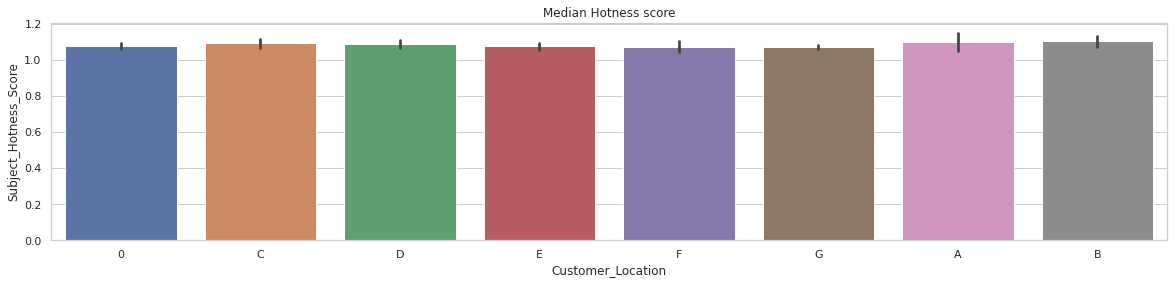

In [ ]:
title = 'Median Hotness score'
result = dataset.groupby(["Customer_Location"])['Subject_Hotness_Score'].aggregate(np.median).reset_index().sort_values('Subject_Hotness_Score')
sns.barplot(x='Customer_Location', y="Subject_Hotness_Score", data=dataset, order=result['Customer_Location'])
plt.title(title)
plt.ioff()

Email Campaign type for every location.

In [ ]:
Campaign_type = dataset.groupby(['Email_Campaign_Type','Customer_Location'])['Customer_Location'].count().unstack()
Campaign_type

Customer_Location,0,A,B,C,D,E,F,G
Email_Campaign_Type,,,,,,,,
1,141,19,42,68,88,96,47,235
2,8175,1013,3084,4015,5199,7132,3128,16206
3,3218,408,1199,1658,2079,2919,1248,6615


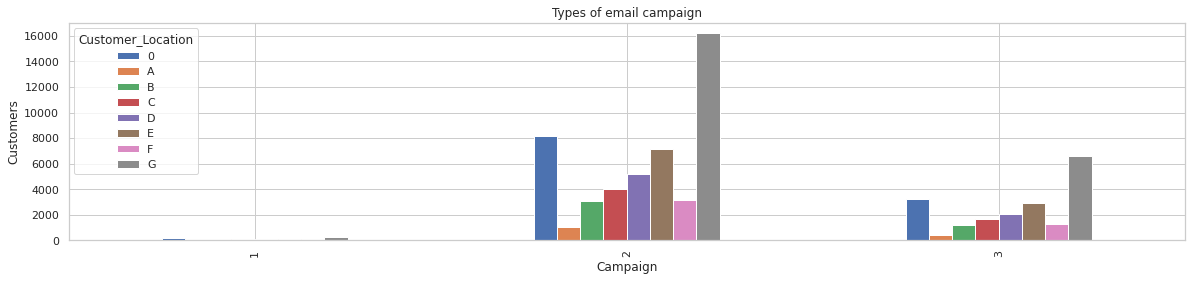

In [ ]:
Campaign_type.plot(kind='bar')

plt.title('Types of email campaign')
plt.ylabel('Customers')
plt.xlabel('Campaign')
plt.rcParams['figure.figsize'] = (40, 5)

Hotness Score as per Location.

In [ ]:
Hotness_score= dataset.groupby(['Customer_Location','Subject_Hotness_Score'])['Subject_Hotness_Score'].count().unstack()

In [ ]:
Hotness_score

Subject_Hotness_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1
Customer_Location,,,,,,,,,,,,,,,,,,,,,
0,925,1002,1080,1146,365,357,366,331,331,276,...,78,60,63,51,47,35,29,22,23,10
A,114,124,139,145,40,37,44,34,29,44,...,15,8,7,4,2,7,10,4,5,1
B,316,384,400,418,130,123,119,125,112,109,...,36,32,19,24,19,5,11,11,10,5
C,475,524,498,603,170,140,175,178,147,135,...,44,33,26,30,21,13,21,17,14,13
D,586,637,698,723,228,215,225,171,228,177,...,50,52,38,25,23,23,20,22,15,13
E,793,909,978,1007,297,293,288,315,283,261,...,85,68,48,46,33,28,21,11,17,11
F,322,392,410,480,119,152,137,114,149,112,...,31,23,15,20,21,14,6,10,5,7
G,1879,2050,2174,2367,673,692,624,689,643,573,...,161,136,129,97,95,70,66,45,36,32


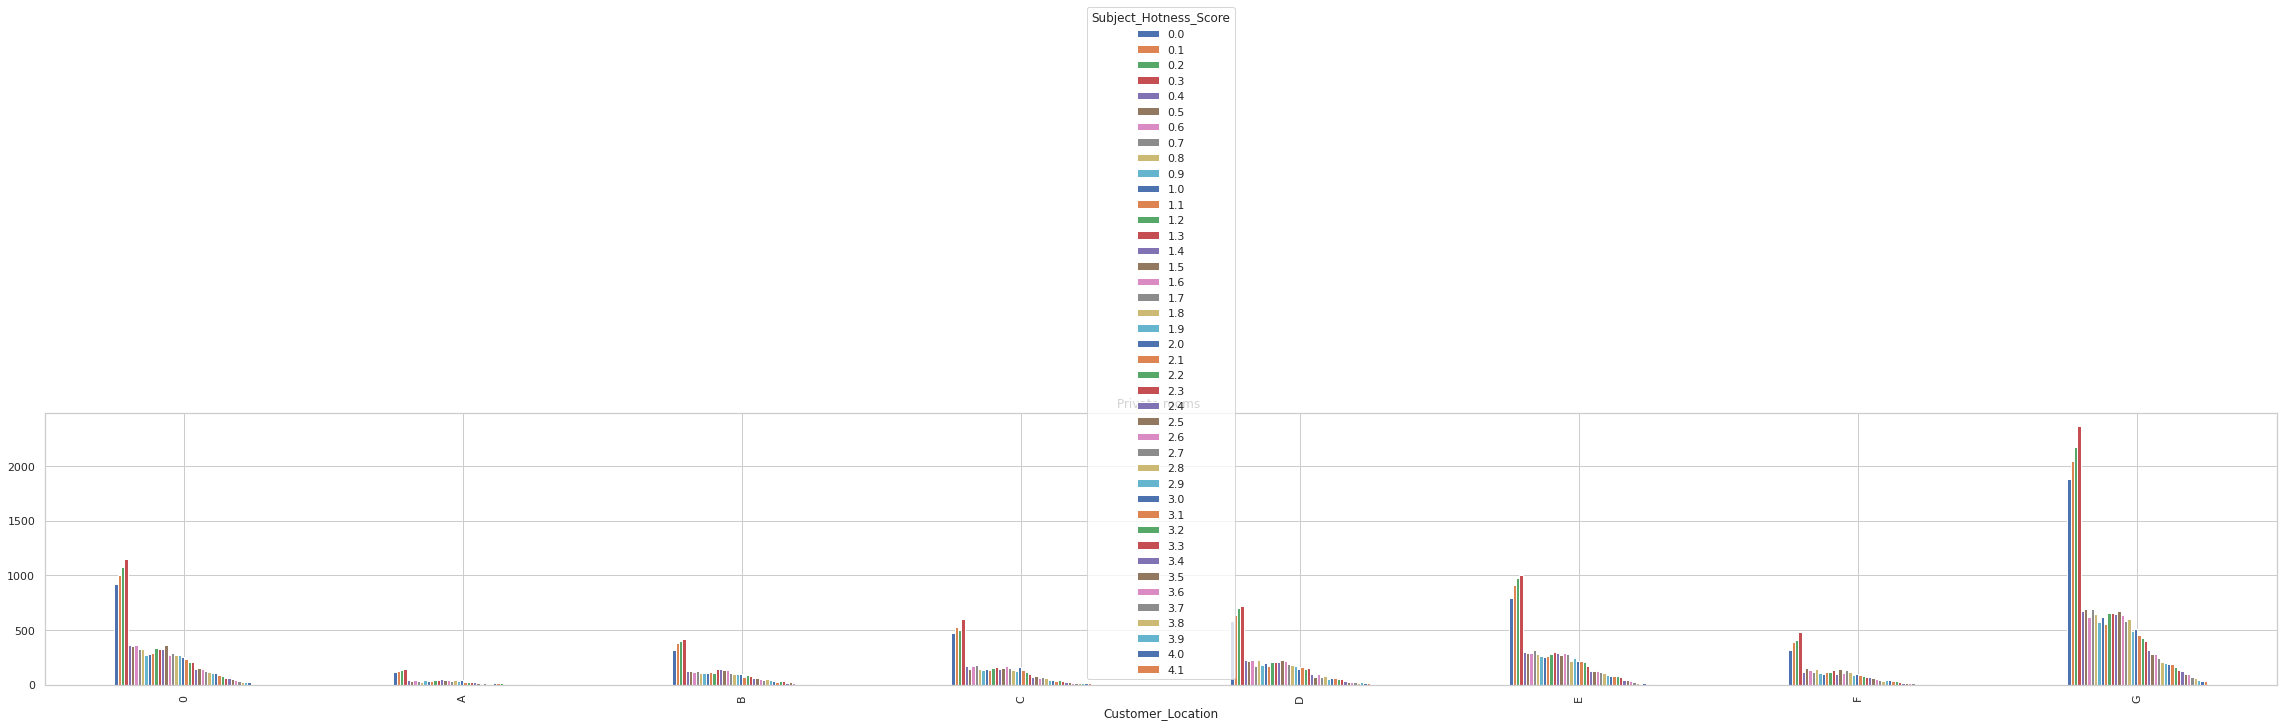

In [ ]:
Hotness_score.plot(kind='bar')

plt.title('Private rooms ')

plt.rcParams['figure.figsize']=(50,4)

From the above bar graph we can see that Maximum hotness score for all the location is "0.3"

Email Status based on previous communication.

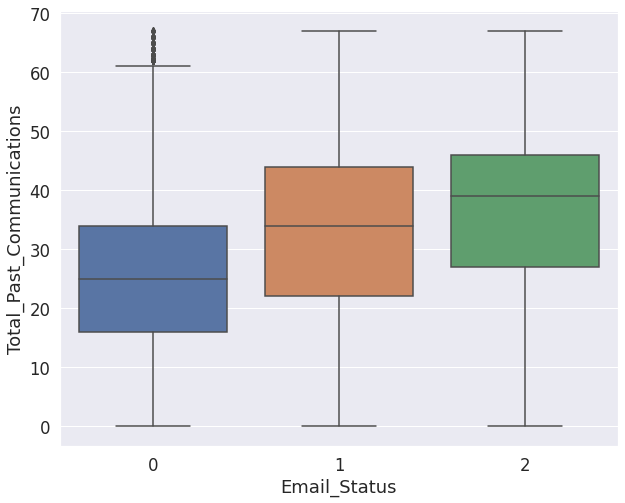

In [ ]:
sns.set(style='whitegrid')
#plt.figure(figsize=(7.50,2.50))
sns.set(rc={'figure.figsize':(10,8)},font_scale=1.5)
ax = sns.boxplot(y='Total_Past_Communications',x='Email_Status',data=dataset ,orient="v")




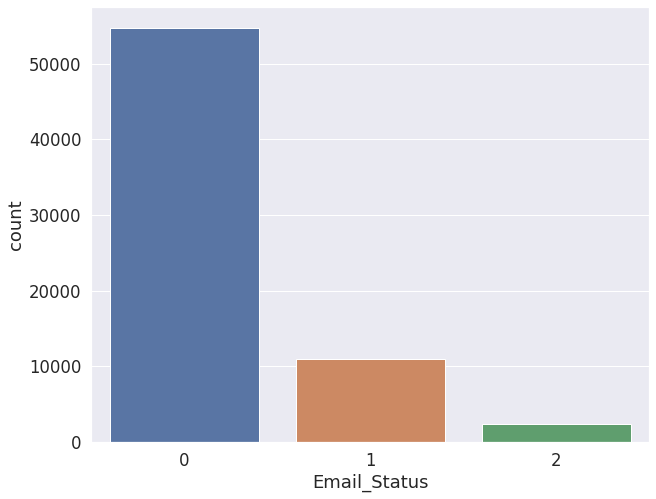

In [ ]:
sns.countplot(x=dataset['Email_Status'])

**Correlation**

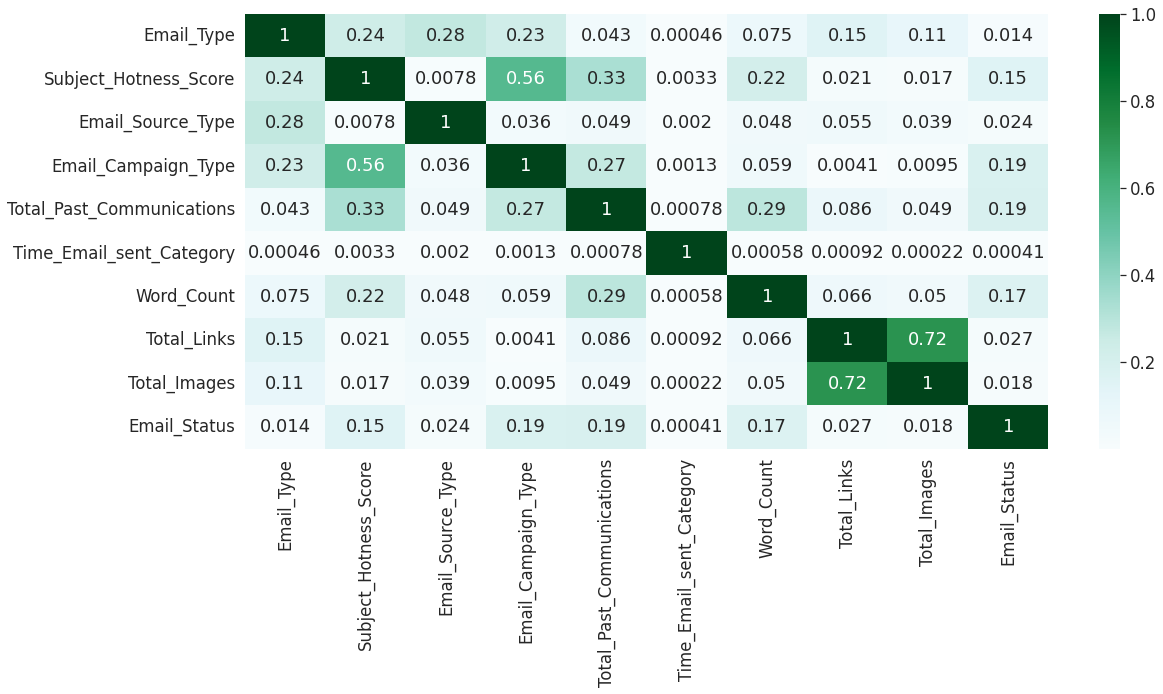

In [ ]:
plt.figure(figsize=(18,8))
correlation = dataset.corr()

sns.heatmap(abs(correlation), annot=True, cmap='BuGn')


**Standardization**-  Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [ ]:
dataset_new=dataset.drop(["Email_ID", "Customer_Location"],axis='columns')

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_new)

In [ ]:
scaled_data


array([[-0.63296315,  1.15173187,  1.09063989, ..., -0.32104503,
        -0.62397577, -0.46379811],
       [ 1.57987081,  1.04893059, -0.91689293, ..., -0.77930614,
        -0.62397577, -0.46379811],
       [ 1.57987081, -1.00709504, -0.91689293, ..., -0.77930614,
        -0.62397577,  1.54774803],
       ...,
       [-0.63296315,  1.15173187,  1.09063989, ..., -0.16829133,
        -0.62397577, -0.46379811],
       [-0.63296315, -0.6986912 , -0.91689293, ...,  0.59547719,
         0.095573  , -0.46379811],
       [-0.63296315,  0.4321229 , -0.91689293, ..., -0.62655243,
        -0.62397577, -0.46379811]])

In [ ]:
#Variance
scaled_data.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## <b>Train and Test Analysis 

In [ ]:
# Data for all the independent variables
X = dataset.drop(labels=['Email_Status','Email_ID','Customer_Location'],axis=1)

# Data for the dependent variable
Y = dataset['Email_Status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0) 


In [ ]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(54425, 9) (54425,)
(13607, 9) (13607,)


## Training a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Provide the range of values for chosen hyperparameters

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=50)

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 50}

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)
test_preds = rf_optimal_model.predict_proba(X_test)

In [ ]:
len(train_preds)

54425

In [ ]:
test_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8104180064308681
The accuracy on test dataset is 0.8098772690526934


**Confusion Matrices**-  Confusion Matrix gives a comparison between Actual and predicted values.

The confusion matrix is a N x N matrix, where N is the number of classes or outputs.

In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [ ]:
train_cm

array([[43715,    61,     0],
       [ 8353,   392,     0],
       [ 1755,   149,     0]])

In [ ]:
test_cm

array([[10926,    16,     0],
       [ 2103,    94,     0],
       [  444,    24,     0]])

**ROC_AUC Score**-  AUC-ROC is the valued metric used for evaluating the performance in classification models. The AUC-ROC metric clearly helps determine and tell us about the capability of a model in distinguishing the classes. The judging criteria being - Higher the AUC, better the model. 

In [ ]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds,multi_class="ovr")
test_auc = roc_auc_score(Y_test,test_preds,multi_class='ovr')

In [ ]:
train_auc

0.7734866338768982

In [ ]:
test_auc

0.7675528328283624

**Feature importance** refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.


Important features mean the features that are more closely related with dependent variable and contribute more for variation of the dependent variable.

In [ ]:
rf_optimal_model.feature_importances_

array([1.65890167e-02, 1.32415821e-01, 6.42164717e-03, 3.40947978e-01,
       3.32609356e-01, 1.56924053e-04, 1.29946455e-01, 3.69047548e-02,
       4.00804780e-03])

In [ ]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Email_Type,0.02
1,Subject_Hotness_Score,0.13
2,Email_Source_Type,0.01
3,Email_Campaign_Type,0.34
4,Total_Past_Communications,0.33


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
3,Email_Campaign_Type,0.34
4,Total_Past_Communications,0.33
1,Subject_Hotness_Score,0.13
6,Word_Count,0.13
7,Total_Links,0.04
0,Email_Type,0.02
2,Email_Source_Type,0.01
5,Time_Email_sent_Category,0.00
8,Total_Images,0.00


**SHAP**- SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs()

In [143]:
X_shap=X_train
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(X_shap)

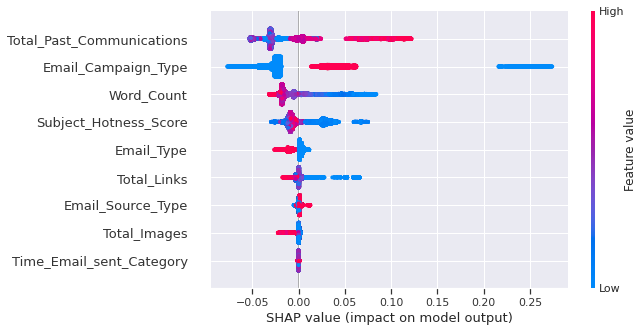

In [144]:
shap.summary_plot(shap_values[1],X_shap, plot_type="dot")

In [ ]:
#for test data
X_shap=X_test
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(X_shap)

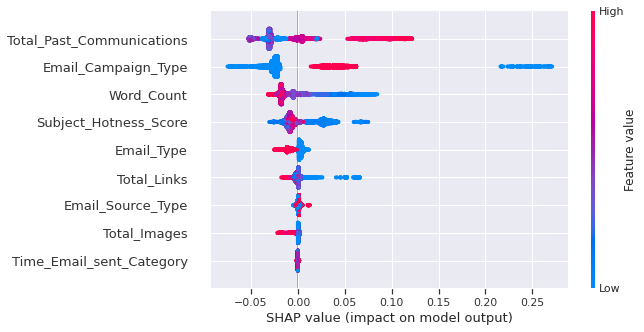

In [ ]:
shap.summary_plot(shap_values[1],X_shap, plot_type="dot")


1) Red dot are those observation for which  this variable is taking high value.

2) Blue dot are those observation for which  this variable is taking low value.


3) If shap value is positive then the variable is increasing the probability of class 1.


4) If shap value is negative then the variable is decreasing the probability of class 1.




#### <b> Conclusion</b>

From the above plot, we can see that the negative value of shap shows the Emails that have been ignored. 

The positive value of shap shows the variable which is responsible for reading and acknowledging the Email.
 
AUC value for training data- 0.7708421124964002

AUC value for test data- 0.7646248070389722

As we know higher the AUC, better the model. It proves that our model is predicting values efficiently. 